In [ ]:
!jupyter nbconvert --to html a15.ipynb

[NbConvertApp] Converting notebook a15.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 44 image(s).
[NbConvertApp] Writing 46421977 bytes to a15.html


# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user
!pip install tensorflow==2.15.0
!pip install scikit-learn seaborn matplotlib numpy pandas opencv-python -q --user

In [ ]:
from IPython.display import display

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import seaborn as sns                                                                            # Importing seaborn to plot graphs
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing



# Tensorflow / Keras - all the required sub-modules from Keras
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img                            # Importing the ImageDataGenerator for data augmentation
from keras.models import Sequential, Model, clone_model                                            # Importing the sequential module to define a sequential model
from keras.layers import Input,Conv2D,MaxPooling2D,BatchNormalization,Activation,LeakyReLU,Dropout,SpatialDropout2D,Dense,Flatten   # Defining all the layers to build our CNN Model
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import losses, optimizers, backend
from keras.optimizers import Adam,SGD, RMSprop                                               # Importing the optimizers which can be used in our model
from keras.utils import to_categorical


from sklearn import preprocessing                                                                   # Importing the preprocessing module to preprocess the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images



import numpy as np      # Library for performing numerical computations
import matplotlib.pyplot as plt     # Library for creating and showing plots
import matplotlib.image as mpimg      # Library for reading and showing images


import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


keras.utils.set_random_seed(416)  # Set the seed using keras.utils.set_random_seed. This will set: 1) `numpy` seed 2) backend random seed 3) `python` random seed

## Loading the dataset

In [ ]:
      # Mounting Drive to Colab
from google.colab import drive
drive.mount('/H', force_remount=True)

      # Change working directory
%cd /H/My Drive/AIML Work/Project - Plants Seedling Classification

In [ ]:
# Load the image file of dataset
images = np.load('images.npy')

# Load the labels file of dataset
labels = pd.read_csv('Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(images.dtype)
print(images.ndim)

(4750, 128, 128, 3)
uint8
4


### NOTES:
- There are 4750 images
- Each Image is 128x128 pixel size by 3 channels

## Exploratory Data Analysis

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

(4750, 1)

dtype('O')

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


,Label
4730,Loose Silky-bent
4731,Loose Silky-bent
4732,Loose Silky-bent
4733,Loose Silky-bent
4734,Loose Silky-bent
4735,Loose Silky-bent
4736,Loose Silky-bent
4737,Loose Silky-bent
4738,Loose Silky-bent
4739,Loose Silky-bent


,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


<Axes: xlabel='proportion', ylabel='Label'>

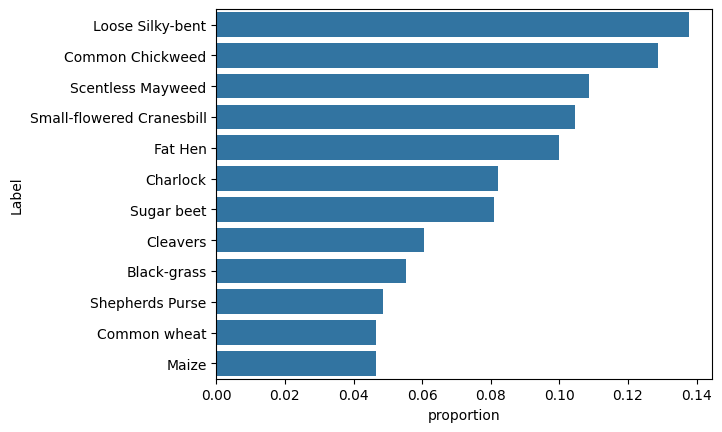

In [ ]:
display(labels.shape)
display(labels['Label'].dtype)
display(labels.head(20))  # checking first 20 records;
display(labels.tail(20))  # checking first 20 records;
display(labels.value_counts())  # show counts of plants
sns.countplot(y='Label', data=labels, order=labels['Label'].value_counts().index, stat='proportion') # show the same graphically

### NOTES:
- Data is Highly Imbalanced with difference in counts almost 3 times higher  / lower beteween plants
- All Plant has sufficient number of counts in data

### IMAGE VISUALIZATION
Creating a Function to plot series of images later:

In [ ]:
def plot_images_same_label(images, labels, selected_label, grid_size):
    """ Plots 16 random images that belong to the specified label.
          - images (np.ndarray): Array of images
          - labels (np.ndarray / list): Array of labels
          - selected_label (str or int): The label for which images will be displayed
          - grid_size (int): how many pictures to show on a side of squared matrix figure: 2,3,4?  (equal to 4, 9 or 16 images in total?)     """
    labels = np.array(labels)     # Ensure labels are a NumPy array for efficient indexing
    label_indices = np.where(labels == selected_label)[0]   # Find indices where the label matches the selected label
    selected_indices = np.random.choice(label_indices, grid_size**2, replace=False)   # Randomly select 16 unique indices from the available indices
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size**2, grid_size**2)) # Create a 4x4 grid for plotting
    fig.suptitle(f"Example of Images for: {selected_label}", fontsize=grid_size**2)

    for idx, ax in zip(selected_indices, axes.flatten()):
        ax.imshow(images[idx])
        ax.set_title(f"{labels[idx]}", fontsize=12)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Review of Images:
We plot 3x3=9 images for each plant

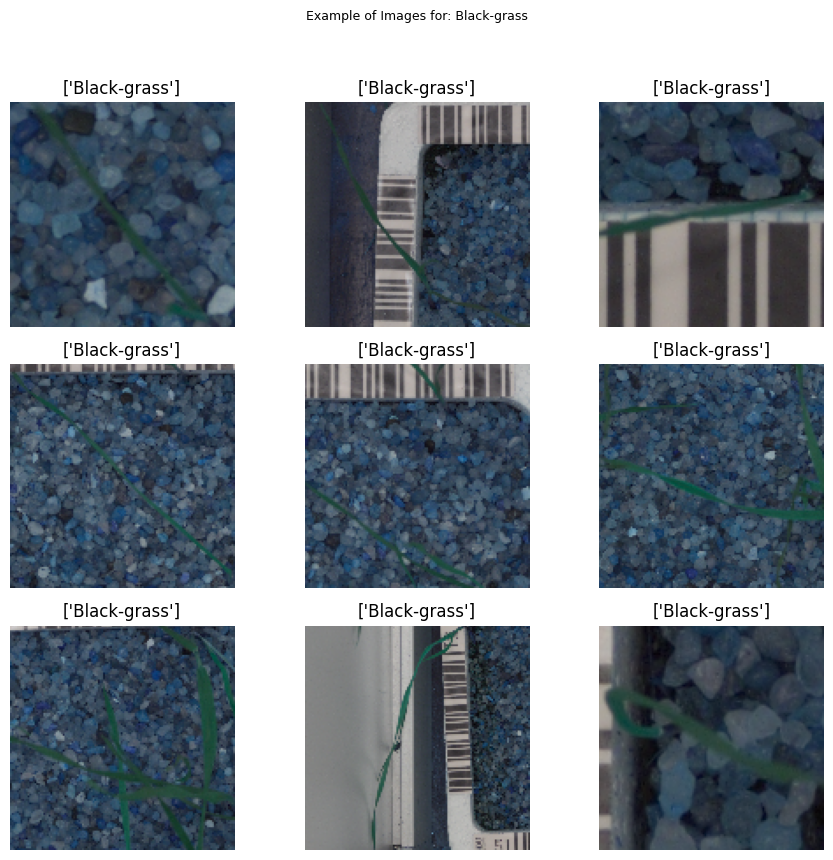

In [ ]:
for label in np.unique(labels):
        plot_images_same_label(images, labels, label, 3); print('\n\n\n')



### NOTES:
- All pictures in different zoom level -> We might need to try data augmentation with focus on image translation
- No need for cropping as imagees seems to be previosuy cropped
- The green color seems to be the channel with most consistent potential for edge detection / feature extraction
- Brighness and contrast might be challenging to use for edge detections
- All pictures vary a lot in sharpness / blurr. It means that:
  - A combination of bigger and smaller filters/kernel might be helful or longer chain of filter/kernels
  - We might need to equalize by kernel blur/sharpen filter, potentially by sequence blur -> re-sharpen steps?

#### SUGGESTIONS:
- Do not grayscale
- Do not do cropping
- Try Data augmentation with focus on translational transformations
- More layers of Kernels to try

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
images_rgb = np.zeros_like(images) # Create an array with the same shape and filled with zeros
    # Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images_rgb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    # Check Images again
for label in np.unique(labels):
        plot_images_same_label(images_rgb, labels, label, 4); print('\n\n\n')


Output hidden; open in https://colab.research.google.com to view.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

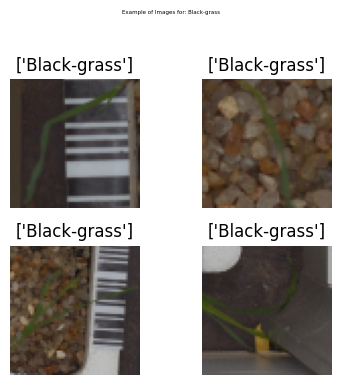

In [ ]:
images_rgb_sml = []   # declares empty list
for i in range(len(images_rgb)):
  images_rgb_sml.append(cv2.resize(images_rgb[i], (64,64), interpolation=cv2.INTER_LINEAR))    # resize to 64x64
images_rgb_sml = np.array(images_rgb_sml) # Convert the list to a NumPy array
    # Check Images again
for label in np.unique(labels):
        plot_images_same_label(images_rgb_sml, labels, label, 2); print('\n\n\n')


### NOTES:
- It seems transformatiosn were successfull
- Linkage between images and Labels has not been lost

### Data Preparation for Modeling

- Here, we split the data into train, test, and validation (my way first and then rename it in order to reuse code snipltes for better efficiency)
- We'll encode categorical features and scale the pixel values.


### Spliting the dataset:

In [ ]:

keras.utils.set_random_seed(416)  # Set the seed using keras.utils.set_random_seed. This will set: 1) `numpy` seed 2) backend random seed 3) `python` random seed


In [ ]:
labels['Set'] = None    # Creating empty 'Set' var that will hold the split

# For each Label or SubSample, assign test-train-validation splits
for PlantName in labels['Label'].unique():
    SubSample = labels['Label'] == PlantName
    n = SubSample.sum()
    sets = np.array(['Train'] * int(0.85 * n) + ['Validation'] * int(0.05 * n) + ['Test'] * (n - int(0.85 * n) - int(0.05 * n)))  # Create array with exact proportions
    labels.loc[SubSample, 'Set'] = np.random.permutation(sets)    # Randomize the order

print(labels.groupby('Label')['Set'].value_counts(normalize=True).mul(100).unstack())   # Quick check proportions within each SubSample
print(labels['Set'].value_counts(), end='\n')

is_train = labels['Set'] == 'Train'   # Checking Train counts
print(is_train.value_counts())

Set                             Test      Train  Validation
Label                                                      
Black-grass                10.266160  84.790875    4.942966
Charlock                   10.256410  84.871795    4.871795
Cleavers                   10.452962  84.668990    4.878049
Common Chickweed           10.147300  84.942717    4.909984
Common wheat               10.407240  84.615385    4.977376
Fat Hen                    10.315789  84.842105    4.842105
Loose Silky-bent           10.244648  84.862385    4.892966
Maize                      10.407240  84.615385    4.977376
Scentless Mayweed          10.271318  84.883721    4.844961
Shepherds Purse            10.389610  84.848485    4.761905
Small-flowered Cranesbill  10.282258  84.879032    4.838710
Sugar beet                 10.129870  84.935065    4.935065
Set
Train         4030
Test           488
Validation     232
Name: count, dtype: int64
Set
True     4030
False     720
Name: count, dtype: int64


### NOTES:
- Ratio 85/5/15 was selected strategically: Limited Data will harder hit smaller subsaples - TEST and VALIDATION. This will increase their errors. But the negative impact of these 2 errors will be very different:

    1) High TEST Error due to small size of Test data could "kill" (render it "bad") even a good model just by chance

    2) High VALIDATION Error due to small size of Validation data could make learning and optimization harder

- Given Validation is iterative process where multple iterative errors would compensate for each other, the priotiry was given to minimize TEST error and give Test dataset a bigger portion (10% vs 5% for Validation data)

### Encode the target labels and Reformat Splitting  for better efficiency & compatibility

In [ ]:
label_encoder = LabelEncoder()    # Create and fit label encoder
label_encoder.fit(labels['Label'])  # Fit on all labels to ensure all classes are known

# LET'S MAKE SPLITTING MORE TRADITIONAL:

# Split images array (X)
X_train = images_rgb_sml[labels['Set'] == 'Train']
X_val = images_rgb_sml[labels['Set'] == 'Validation']
X_test = images_rgb_sml[labels['Set'] == 'Test']

# Split labels array (y)
y_train = label_encoder.transform(labels[labels['Set'] == 'Train']['Label'].values)
y_val = label_encoder.transform(labels[labels['Set'] == 'Validation']['Label'].values)
y_test = label_encoder.transform(labels[labels['Set'] == 'Test']['Label'].values)

# Verify shapes
print("X shapes:", X_train.shape, X_val.shape, X_test.shape)
print("y shapes:", y_train.shape, y_val.shape, y_test.shape)
print("y_train type:", y_train.dtype)  # Checkin if it is int



X shapes: (4030, 64, 64, 3) (232, 64, 64, 3) (488, 64, 64, 3)
y shapes: (4030,) (232,) (488,)
y_train type: int64


### Data Normalization

In [ ]:
# Normalizing the image pixels (Rescaling)
X_train = X_train.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0


### Data Re-Balancing
Class and Sample Weights Calcuations

In [ ]:
# Calculating class weights
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Original class distribution:")
print(class_counts)

# Calculating weights inversely proportional to class frequencies
max_samples = max(counts)
class_weights = {label: max_samples/count for label, count in class_counts.items()}
print("\nClass weights:")
print(class_weights)

# Creating sample weights matching training data order
sample_weights = np.array([class_weights[y] for y in y_train])


Original class distribution:
{0: 223, 1: 331, 2: 243, 3: 519, 4: 187, 5: 403, 6: 555, 7: 187, 8: 438, 9: 196, 10: 421, 11: 327}

Class weights:
{0: 2.4887892376681613, 1: 1.6767371601208458, 2: 2.2839506172839505, 3: 1.069364161849711, 4: 2.9679144385026737, 5: 1.3771712158808933, 6: 1.0, 7: 2.9679144385026737, 8: 1.2671232876712328, 9: 2.8316326530612246, 10: 1.3182897862232779, 11: 1.6972477064220184}


## Model Building

### NOTES:
- Heavier arrays of Conv layers will be tried and they will be gradually increasing in quanity in order to better catch hearchical features
- Heavier dropouts will be tried due to limited train data / higher risk of overfitting -> stronger effort to control it
- More Batch normalizations will be tried in order ot keep this more complex network away from extremes and traps (more complex network fitting smaller data -> higher chance of learning derailing -> stronger effort to keep it on track)

In [ ]:
backend.clear_session()   # Clearing backend

In [ ]:
# Intializing a sequential model

model_0 = Sequential()
model_0.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_0.add(BatchNormalization())
model_0.add(MaxPooling2D((2, 2), padding = 'same'))

model_0.add(Conv2D(80, (1, 1), activation='relu', padding="same"))
model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_0.add(BatchNormalization())
model_0.add(MaxPooling2D((2, 2), padding = 'same'))
model_0.add(SpatialDropout2D(0.25))

model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_0.add(BatchNormalization())
model_0.add(MaxPooling2D((2, 2), padding = 'same'))
model_0.add(SpatialDropout2D(0.25))

model_0.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_0.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_0.add(BatchNormalization())
model_0.add(MaxPooling2D((2, 2), padding = 'same'))
model_0.add(SpatialDropout2D(0.25))

model_0.add(Flatten())

model_0.add(Dense(256, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.5))
model_0.add(Dense(64, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.25))
model_0.add(Dense(32, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dense(12, activation='softmax'))


# Generating the summary of the model
model_0.summary()

# opt=Adam()
model_0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )    # Model compilation
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)   # Early stopping to prevent overfitting
history_0 = model_0.fit(
                        X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        class_weight=class_weights)   # Training


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.0954 - loss: 4.7856 - val_accuracy: 0.1207 - val_loss: 3.5971
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2128 - loss: 3.6143 - val_accuracy: 0.2155 - val_loss: 2.0528
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3027 - loss: 3.0660 - val_accuracy: 0.3276 - val_loss: 1.9437
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4011 - loss: 2.7656 - val_accuracy: 0.4655 - val_loss: 1.5247
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4580 - loss: 2.5421 - val_accuracy: 0.2543 - val_loss: 2.3215
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4863 - loss: 2.3182 - val_accuracy: 0.6250 - val_loss: 1.1030
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5215 - loss: 2.2233 - val_accuracy: 0.5388 - val_loss: 1.1997
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5693 - loss: 2.0234 - val_ac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 80)          │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_1                  │ (None, 8, 8, 64)            │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │              

 Total params: 2,844,662 (10.85 MB)

 Trainable params: 947,772 (3.62 MB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 1,895,546 (7.23 MB)

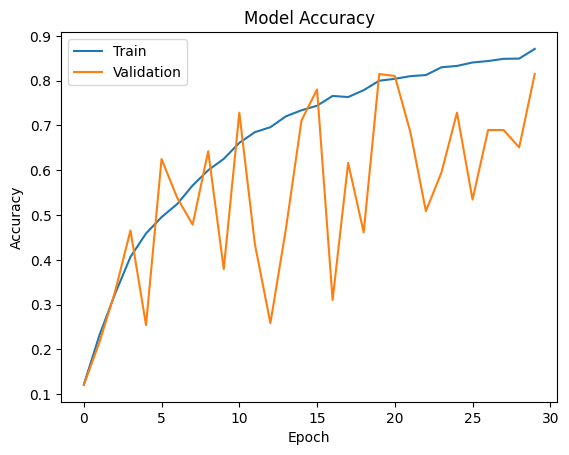

In [ ]:
    # Plotting the history of model Accuracy
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### NOTES:

- We can see from the above plot that the training accuracy of the model was resonable and validation accuracy was comparable.
- High vloatility of Validation resutls is expected / has been anticipated given smaller portion of data was allocated to Validation.

## Model Performance Improvement

**Reducing the Learning Rate:**

**NOTE**: We will use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate.

In [ ]:
backend.clear_session()   # Clearing backend
model_1 = clone_model(model_0)   # Cloning initial model as it had good performance

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )    # Model compilation
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)   # Early stopping to prevent overfitting
history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr],class_weight=class_weights)   # Training


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.1214 - loss: 4.4465 - val_accuracy: 0.1207 - val_loss: 3.8154 - learning_rate: 0.0010
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2646 - loss: 3.2988 - val_accuracy: 0.3793 - val_loss: 1.8941 - learning_rate: 0.0010
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3671 - loss: 2.8081 - val_accuracy: 0.4784 - val_loss: 1.4744 - learning_rate: 0.0010
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4405 - loss: 2.5548 - val_accuracy: 0.5302 - val_loss: 1.3648 - learning_rate: 0.0010
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5113 - loss: 2.3603 - val_accuracy: 0.4784 - val_loss: 1.6021 - learning_rate: 0.0010
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5448 - loss: 2.1453 - val_accuracy: 0.5345 - val_loss: 1.2755 - learning_rate: 0.0010
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5961 - loss: 1

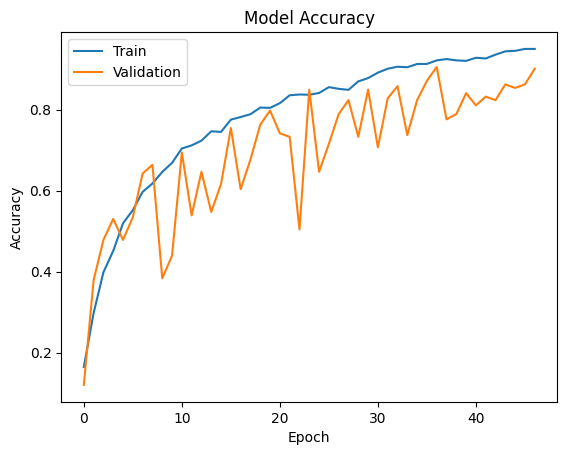

In [ ]:
    # Plotting the history of model Accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### NOTES:
- Noticeable improvement in Validation Accruacy / same for Training performance
- Model became less overfitting and validation accuracy is MORE stable now


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
#  initialize an ImageDataGenerator  and assigns it to the variable train_datagen
train_datagen = ImageDataGenerator(                               #rescale=1. / 255.0,
                    horizontal_flip=True,
                    vertical_flip=True,
                    rotation_range=20,
                    zoom_range=0.2,
                    fill_mode='nearest')



In [ ]:
backend.clear_session()   # Clearing backend
model_2 = clone_model(model_0)   # Cloning initial model as it had acceptable performance

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )    # Model compilation
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)   # Early stopping to prevent overfitting
history_2 = model_2.fit(train_datagen.flow(X_train,y_train, batch_size=32, seed=416, shuffle=False),
                        epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping],class_weight=class_weights)   # Training


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 27s 121ms/step - accuracy: 0.0870 - loss: 4.5609 - val_accuracy: 0.0517 - val_loss: 3.2655
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.0847 - loss: 4.4021 - val_accuracy: 0.0733 - val_loss: 2.4913
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.0732 - loss: 3.8099 - val_accuracy: 0.0647 - val_loss: 2.4938
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.0700 - loss: 3.9425 - val_accuracy: 0.1207 - val_loss: 2.4641
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0801 - loss: 4.0847 - val_accuracy: 0.1121 - val_loss: 2.4638
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.0802 - loss: 4.3245 - val_accuracy: 0.0991 - val_loss: 2.4686
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.0782 - loss: 4.0808 - val_accuracy: 0.1078 - val_loss: 2.4671
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.0726 - loss: 3.9099 - v

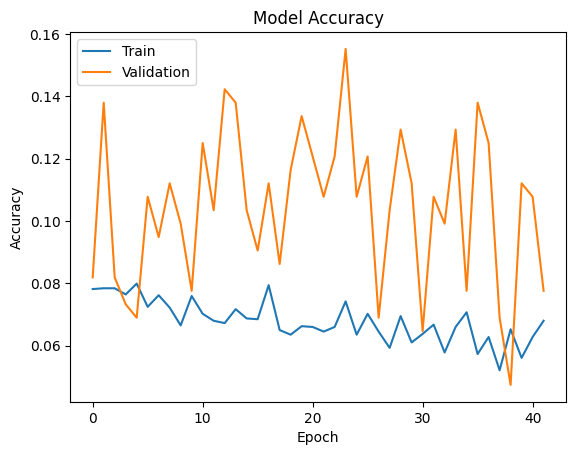

In [ ]:
    # Plotting the history of model Accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### NOTES:
- Obvsiouly bad perfromance - image generation did not work at all and even destroyed previous performance

#### SUGGESTION:
- Drop Data Augmentation

## Final Model

### **Model Performance Comparison and Final Model Selection**

Models developed performed as follows:

- Model 0: Train / Validation Accuracy = 86.76% / 81.47%
- Model 1: Train / Validation Accuracy = 94.96% / 90.09%
- Model 2: Train / Validation Accuracy = 09.52% / 05.60%

The highest Validation Accuracy among all models tested is Model 1  ("Model_1: Neural Network with Balanced Data and Dynamic Learning Rate).



In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_1.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


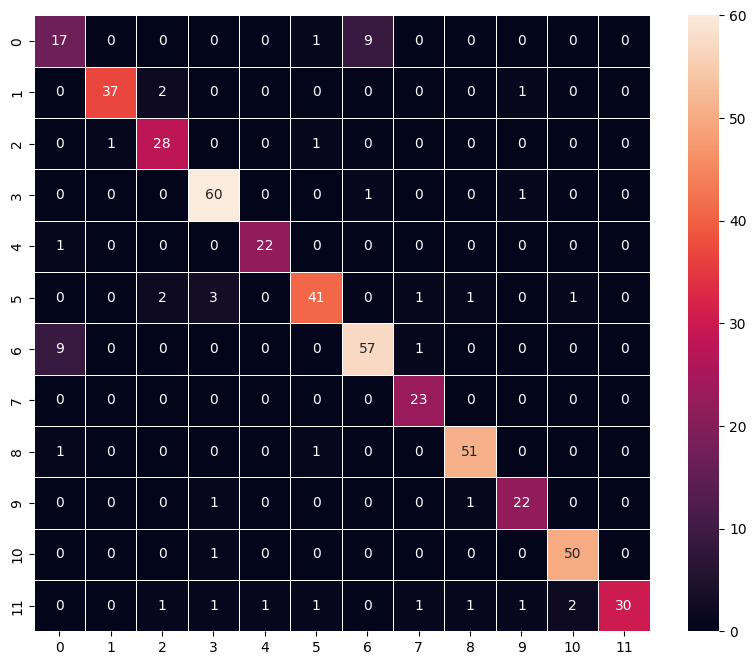

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test,y_pred_arg) # Plotting the Confusion Matrix using predefined fucntion tensorflow
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### NOTES:
- Plant #1 is often confused for Plant #7 due to their natural similarities: Accruacy > 60%
- Plant #12 is the secodn worst at 75% accruacy
- Everything else is pretty good

In [ ]:
accuracy = model_1.evaluate(X_test, y_test, verbose=2)  # Complete the code to evaluate the model on test data

16/16 - 1s - 37ms/step - accuracy: 0.8975 - loss: 0.3249


### Final Performance:
-The best model performed even better at the TEst data delivering 89.75% accuracy

### Visualizing the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


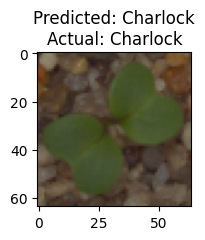

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


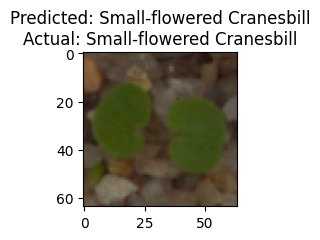

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


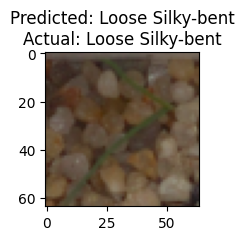

In [ ]:
    # Selecting 3 random records
random_indices = np.random.choice(X_test.shape[0], size=3, replace=False)

    # Displaying images and labels
for index in random_indices:
      image = X_test[index].reshape(1, 64, 64, 3) # Get the image and reshape for prediction
        # Predicting the label
      predicted_probabilities = model_1.predict(image)
      predicted_class_index = np.argmax(predicted_probabilities, axis=1)
      predicted_label = label_encoder.inverse_transform(predicted_class_index)[0]
        # Get the actual label
      actual_label = label_encoder.inverse_transform([y_test[index]])[0]
        # Display the image and labels
      plt.figure(figsize=(2, 2))
      plt.imshow(X_test[index])
      plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
      plt.show()

## Actionable Insights and Business Recommendations


### Key Insights from the Analysis

**Model Performance**: The final model achieved significant accuracy levels, demonstrating strong classification capabilities for most plant categories. However, some categories (e.g., Black-grass and Maize) showed higher misclassification rates due to similarities in visual features.

**Class Imbalance**: Analysis revealed imbalances in the dataset, with certain categories like Loose Silky-bent having significantly more samples compared to others such as Maize and Shepherd's Purse. Addressing this imbalance through weighted losses and class-specific sampling improved model performance.

**Optimization Strategies**: Techniques such as learning rate adjustments (ReduceLROnPlateau) were crucial in enhancing the model's ability to generalize. Additionally, the use of spatial dropout layers helped mitigate overfitting.

### Implications for Agriculture

**Enhanced Decision-Making**: The model's ability to classify seedlings with high accuracy enables farmers to make informed decisions about plant health and weed management.

**Labor Efficiency**: By automating seedling identification, significant reductions in manual effort can be achieved, allowing workers to focus on more strategic tasks.

**Sustainability Practices**: Accurate seedling classification aids in targeted application of resources (e.g., fertilizers and pesticides), minimizing waste and promoting sustainable agricultural practices.

### Business Recommendations

**Deployment Strategy**:
Develop a mobile or web-based platform where farmers can upload seedling images for real-time classification.
Expand the model's dataset by incorporating images from diverse geographical regions to ensure robustness across climates and terrains.

**Collaborations and Partnerships**:
Partner with agricultural research institutions to enhance the dataset and validate the model.
Collaborate with tech companies specializing in IoT devices to integrate the classification system into automated farming tools.


### Next Steps

**Real-World Testing**: Conduct field trials with farmers to assess model performance under practical conditions and refine as needed.

**Dataset Expansion**: Address data scarcity for underrepresented classes by incorporating more samples and using synthetic data generation techniques.

**Continuous Improvement**: Maintain the model with regular updates from new datasets and incorporate user feedback to enhance usability and accuracy.

By implementing these recommendations, this project can transform into a scalable and useful solution that would drive efficiency and sustainability in agriculture.

_____